In [74]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display


from quilt.data.ResidentMario import missingno_data
import missingno as msno

%matplotlib inline

### Ideas:
 - Correlation Plot
 - LSTM prediction algorithm
 - 

In [30]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [61]:
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 5000
pd.options.display.max_seq_items = 2000

In [20]:
df_mkt_data = pd.read_csv('../data/market_data.csv')

In [21]:
df_mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563 entries, 0 to 4562
Data columns (total 17 columns):
base_asset_id     4563 non-null object
quote_asset_id    4563 non-null object
epoch_ts          4563 non-null object
price_open        4563 non-null float64
price_high        4563 non-null float64
price_low         4563 non-null float64
price_close       4563 non-null float64
price_mean_a      4563 non-null float64
price_std         4563 non-null float64
price_vwap_a      4563 non-null float64
price_vwap_h      4563 non-null float64
cnt_total         4563 non-null int64
volume_total      4563 non-null float64
volume_high       4563 non-null float64
volume_low        4563 non-null float64
volume_mean_a     4563 non-null float64
volume_std        4563 non-null float64
dtypes: float64(13), int64(1), object(3)
memory usage: 606.1+ KB


In [91]:
df_mkt_data['date'] = pd.to_datetime(df_mkt_data['epoch_ts'])

In [92]:
df_mkt_data.head()

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std,date
0,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-19 00:00:00+00,3932.714647,4093.592472,3841.540000,3947.838332,3982.976819,42.843054,3992.851593,3992.331372,505918,1.016199e+05,3.309573e+02,1.800000e-09,0.245708,1.312071,2019-02-19 00:00:00+00:00
1,Cardano_ADA_ADA,USDollar_USD_USD,2019-02-19 00:00:00+00,0.046611,0.051831,0.044664,0.046850,0.047804,0.000686,0.047779,0.047767,89496,4.697049e+08,1.680672e+06,1.000000e-01,6162.362937,18885.346700,2019-02-19 00:00:00+00:00
2,Dash_DASH_DASH,USDollar_USD_USD,2019-02-19 00:00:00+00,87.616371,91.952000,85.849339,88.389405,88.486393,0.926142,88.470100,88.459994,23643,3.341039e+04,2.255077e+02,1.000000e-08,1.737967,5.353673,2019-02-19 00:00:00+00:00
3,EOS_EOS_EOS,USDollar_USD_USD,2019-02-19 00:00:00+00,3.550629,4.077906,3.401717,3.596504,3.677321,0.061916,3.678656,3.677503,378772,4.808927e+07,3.771251e+04,1.000000e-08,187.935652,547.250706,2019-02-19 00:00:00+00:00
4,Ethereum_ETH_ETH,USDollar_USD_USD,2019-02-19 00:00:00+00,148.700401,154.305449,141.927303,145.123666,148.814893,1.650709,149.044636,149.023308,578049,1.743712e+06,2.000000e+03,1.000000e-08,4.172325,15.892995,2019-02-19 00:00:00+00:00


In [101]:
df_mkt_data.sort_values(by=['date', 'base_asset_id'],inplace=True, ascending=True)

In [103]:
df_mkt_data.head()

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std,date
4552,Bitcoin_BTC_BTC,USDollar_USD_USD,2018-01-01 00:00:00+00,13584.684868,13893.000000,7174.957499,13126.453533,13113.583418,227.090090,13078.443537,13073.950379,445897,6.528863e+04,96.943938,1.000000e-08,0.163340,0.584941,2018-01-01 00:00:00+00:00
4553,Cardano_ADA_ADA,USDollar_USD_USD,2018-01-01 00:00:00+00,0.685733,0.726584,0.663441,0.723160,0.689927,0.012293,0.689143,0.688920,107894,8.827392e+07,170228.000000,1.000000e+00,833.761752,2572.265055,2018-01-01 00:00:00+00:00
4554,Dash_DASH_DASH,USDollar_USD_USD,2018-01-01 00:00:00+00,970.857188,1039.337343,936.854673,993.122740,984.943897,15.426370,984.581466,984.333977,43341,3.436700e+04,149.178920,1.000000e-08,0.861954,2.561028,2018-01-01 00:00:00+00:00
4555,EOS_EOS_EOS,USDollar_USD_USD,2018-01-01 00:00:00+00,7.477168,7.950000,7.140604,7.484662,7.522930,0.117881,7.519023,7.516789,98619,8.095076e+06,29837.077388,1.070000e-06,88.661109,290.860652,2018-01-01 00:00:00+00:00
4556,Ethereum_ETH_ETH,USDollar_USD_USD,2018-01-01 00:00:00+00,713.091791,764.970000,525.336882,741.769308,730.550411,11.058564,730.086219,729.905038,659837,7.134015e+05,4278.328490,1.000000e-08,1.302073,7.151242,2018-01-01 00:00:00+00:00


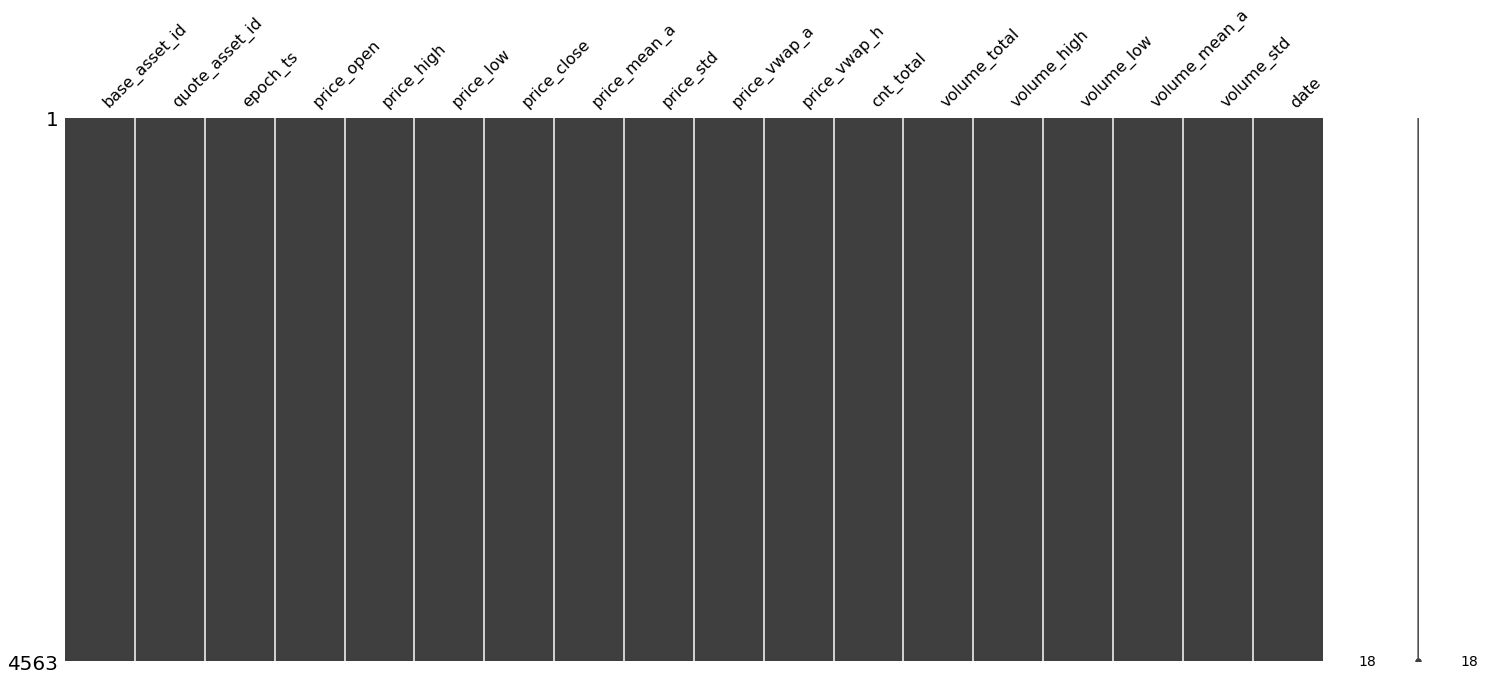

In [104]:
msno.matrix(df_mkt_data) #.sample(250)

In [105]:
lst_cryptos = list(df_mkt_data.base_asset_id.unique())

In [106]:
lst_cryptos

['Bitcoin_BTC_BTC',
 'Cardano_ADA_ADA',
 'Dash_DASH_DASH',
 'EOS_EOS_EOS',
 'Ethereum_ETH_ETH',
 'Litecoin_LTC_LTC',
 'NEO_NEO_NEO',
 'Ripple_XRP_XRP',
 'Stellar_XLM_XLM',
 'TRON_TRX_TRX',
 'Zcash_ZEC_ZEC']

In [107]:
df_btc.head()

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
0,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-19 00:00:00+00,3932.714647,4093.592472,3841.540000,3947.838332,3982.976819,42.843054,3992.851593,3992.331372,505918,101619.904449,330.957347,1.800000e-09,0.245708,1.312071
11,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-18 00:00:00+00,3661.759485,4047.577154,3616.180000,3895.634695,3848.588236,80.176886,3856.053627,3854.317528,448895,108981.912811,200.000000,2.600000e-09,0.311224,1.623624
22,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-17 00:00:00+00,3680.596153,3790.000000,3557.380000,3685.827185,3672.297381,39.168023,3689.018763,3688.460000,285310,53443.075210,170.170324,7.000000e-10,0.218837,1.112831
33,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-16 00:00:00+00,3628.773472,3726.700000,3565.500000,3680.129956,3661.533508,24.003009,3672.371062,3672.082442,237152,36019.338878,495.490424,4.000000e-09,0.162373,1.391119
44,Bitcoin_BTC_BTC,USDollar_USD_USD,2019-02-15 00:00:00+00,3645.881857,3723.073966,3454.773596,3619.933215,3635.845657,26.585699,3646.330828,3645.986842,252249,41402.730643,49.147745,1.000000e-08,0.174970,0.699472


In [108]:
w = widgets.Dropdown(
    options=lst_cryptos,
    value=lst_cryptos[0],
    description='Cryptocurrency: ',
    disabled=False,
    style = {'description_width': 'initial'}
)


In [123]:
display(w)
mask = df_mkt_data['base_asset_id'] == w.value
# Chart the BTC pricing data
btc_trace = go.Scatter(x=df_mkt_data[mask]['epoch_ts'], y=df_mkt_data[mask]['price_mean_a'])
val = w.value.split('_')[0]
layout = go.Layout(
    title=go.layout.Title(
        text=f'{val}',
        xref='paper',
        x=0
    ))
fig = go.Figure(data=[btc_trace], layout=layout)
# py.iplot([btc_trace])
py.iplot(fig, filename='styling-names')

Dropdown(description='Cryptocurrency: ', index=4, options=('Bitcoin_BTC_BTC', 'Cardano_ADA_ADA', 'Dash_DASH_DA…

In [116]:
w.value

'Litecoin_LTC_LTC'